In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
sns.set()

In [3]:
df = pd.read_csv('IBM.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,78.800003,80.570000,78.190002,80.570000,53.418415,7864500
1,2003-01-03,80.699997,81.650002,80.209999,81.650002,54.134457,5962300
2,2003-01-06,81.900002,84.800003,81.809998,83.589996,55.420681,7921300
3,2003-01-07,83.949997,86.180000,83.750000,86.000000,57.018513,11906900
4,2003-01-08,85.550003,85.690002,84.070000,84.190002,55.818470,9508800


In [40]:
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
class TrendLine:
    def __init__(self,X):
        self.X = X
        self.time_stamps = np.arange(1,len(X)+1)
        self.n = len(X)
        self.a = None
        self.b = None
    
    def fit(self):
        sum_x = np.sum(self.X)
        sum_time_stamps = np.sum(self.time_stamps)
        self.a = (np.sum(self.time_stamps*self.X)*self.n-sum_x*sum_time_stamps)\
        /(np.sum(np.power(self.time_stamps,2))*self.n-sum_time_stamps**2)
        self.b = (sum_x-self.a*sum_time_stamps)/self.n
        print('Computed parameters. a : {0}; b: {1}'.format(self.a,self.b))
        return self
    
    def predict(self,time_stamp):
        return self.a*time_stamp+self.b

In [95]:
def predict_and_plot(df,start_time,end_time,column='Close',points_to_predict=10):
    sliced_df = df[df['Date']>=pd.to_datetime(start_time)].copy()
    sliced_df['timestamp'] = np.arange(1,len(sliced_df)+1)
    X,last_point = sliced_df[sliced_df['Date']<=pd.to_datetime(end_time)][column].values,\
    sliced_df[sliced_df['Date']<=pd.to_datetime(end_time)]['timestamp'].values[-1]
    points_to_predict = last_point+points_to_predict
    y,dates = sliced_df[(sliced_df['timestamp']>last_point) & (sliced_df['timestamp']<=points_to_predict)][column].values,\
    sliced_df[(sliced_df['timestamp']>last_point) & (sliced_df['timestamp']<=points_to_predict)].astype(str)['Date'].values
    tl_predictor = TrendLine(X).fit()
    predicted = [tl_predictor.predict(i) for i in range(last_point+1,points_to_predict+1)]
    plt.figure(figsize=(15,12))
    plt.title('Trend line for timestamp from {0} to {1}'.format(last_point,points_to_predict))
    plt.plot(range(len(y)),y,'-o')
    plt.plot(range(len(predicted)),predicted,'--o')
    plt.ylabel('Values')
    plt.xlabel('Date')
    counter = len(predicted)//18
    dates = [dates[i] if counter==0 or i%counter==0   else '' for i in range(0,len(predicted),1) ]
    plt.xticks(range(len(predicted)),dates,rotation=30)
    plt.legend(['True value','Predicted value'])
    
    

Computed parameters. a : -0.348350667532463; b: 86.56233372380947


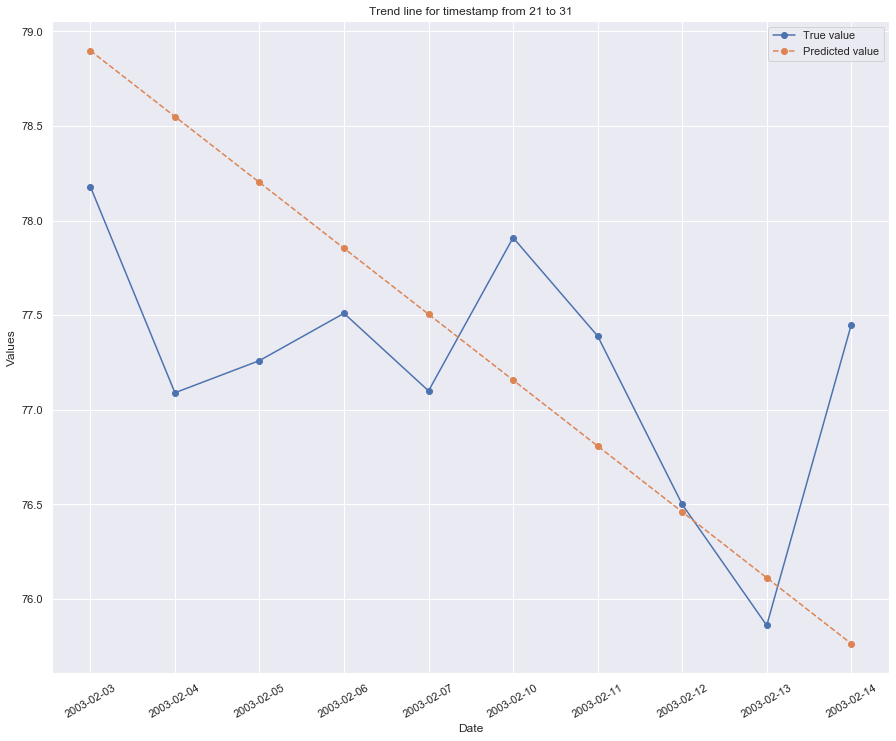

In [101]:
predict_and_plot(df,'2003-01-02','2003-02-02',points_to_predict=10)